# Analyzing Prescriptions Database || **Dillon Shearer 2024**

This notebook executes SQL queries to analyze the data in the prescriptions database. The questions addressed include:
1. **Top Prescribed Drugs**: Which drugs are most commonly prescribed?
2. **Prescriptions by State**: How are prescriptions distributed across different states?
3. **Top Prescribers**: Who are the top prescribers?
4. **Total Cost by Drug**: What is the total cost of each drug?
5. **Average Cost per Prescription by Drug**: What is the average cost per prescription for each drug?
6. **Prescriptions for Beneficiaries Age 65 and Older**: What is the distribution of prescriptions for beneficiaries age 65 and older?


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Move from scripts to main folder
os.chdir('..')

In [3]:
db_file = 'data/medicare_part_d_prescriptions.db'

# Function to create a connection to the SQLite database
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except sqlite3.Error as e:
        print(f"Error: {e}")
    return conn

# Create a database connection
conn = create_connection(db_file)

# Verify connection
if conn:
    print("Database connection established successfully.")
else:
    print("Failed to connect to the database.")

Database connection established successfully.


In [4]:
# Top Prescribed Drugs
query = """
SELECT Brnd_Name, SUM(Tot_Clms) as Total_Claims
FROM prescriptions
GROUP BY Brnd_Name
ORDER BY Total_Claims DESC
LIMIT 10;
"""

top_prescribed_drugs = pd.read_sql_query(query, conn)
top_prescribed_drugs

,Brnd_Name,Total_Claims
0,Atorvastatin Calcium,63965570
1,Amlodipine Besylate,44845968
2,Levothyroxine Sodium,38315219
3,Lisinopril,35069806
4,Gabapentin,33081764
5,Losartan Potassium,30468543
6,Omeprazole,27081531
7,Metoprolol Succinate,26939985
8,Metformin Hcl,23546334
9,Furosemide,21893628


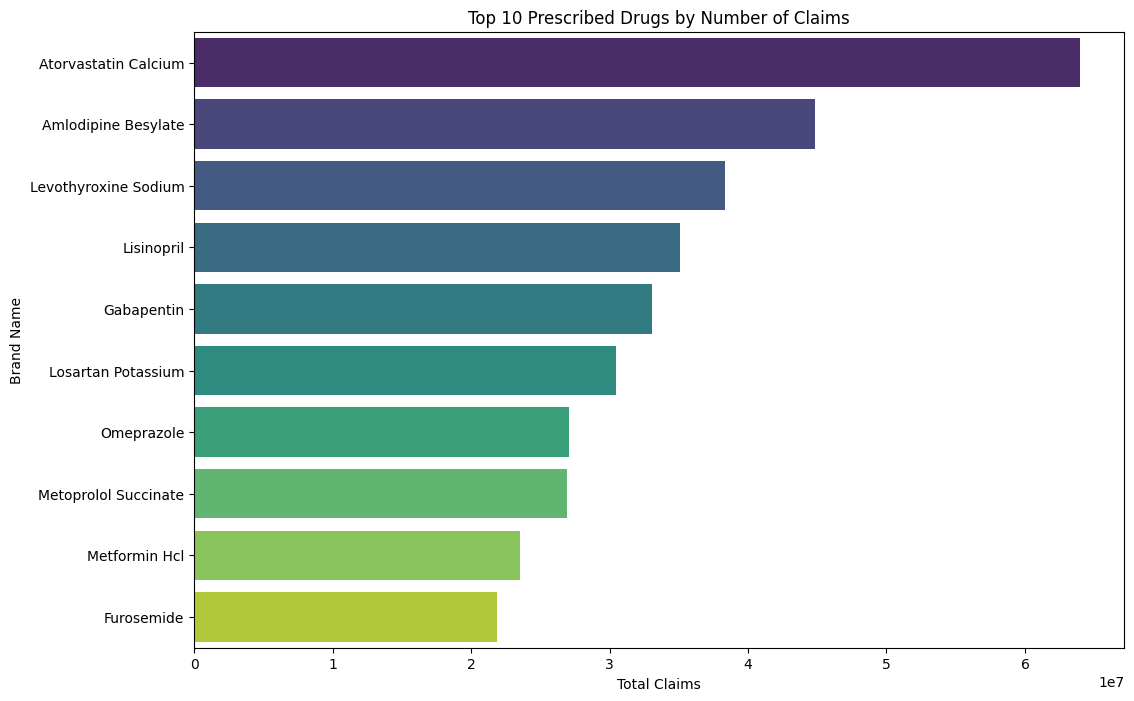

In [5]:
# Visualization for Top Prescribed Drugs
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Claims', y='Brnd_Name', hue='Brnd_Name', data=top_prescribed_drugs, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Prescribed Drugs by Number of Claims')
plt.xlabel('Total Claims')
plt.ylabel('Brand Name')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

In [6]:
# Prescriptions by State
query = """
SELECT Prscrbr_State_Abrvtn, COUNT(*) as Total_Prescriptions
FROM prescriptions
GROUP BY Prscrbr_State_Abrvtn
ORDER BY Total_Prescriptions DESC;
"""

prescriptions_by_state = pd.read_sql_query(query, conn)
prescriptions_by_state

,Prscrbr_State_Abrvtn,Total_Prescriptions
0,CA,2380329
1,FL,1865305
2,TX,1714636
3,NY,1683019
4,PA,1255345
...,...,...
56,XX,623
57,AP,447
58,MP,219
59,AA,115


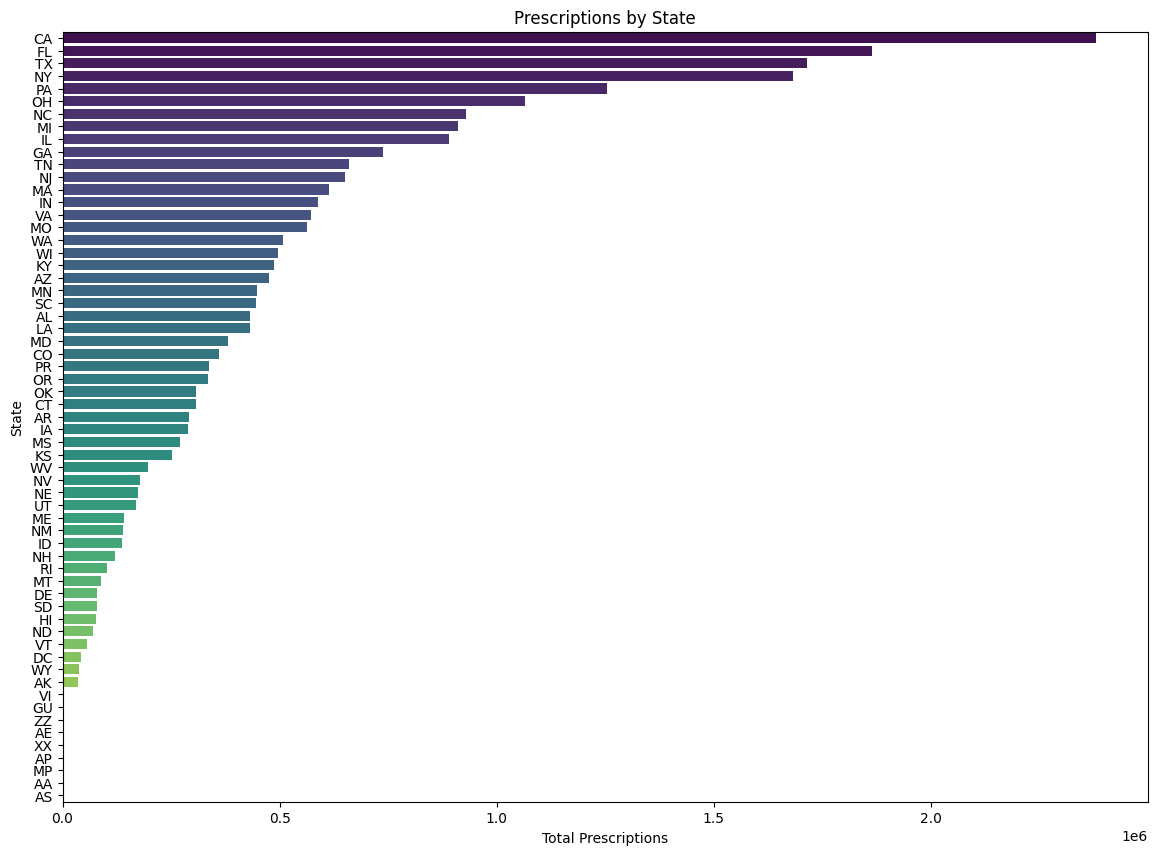

In [7]:
# Visualization for Prescriptions by State
plt.figure(figsize=(14, 10))
sns.barplot(x='Total_Prescriptions', y='Prscrbr_State_Abrvtn', hue='Prscrbr_State_Abrvtn', data=prescriptions_by_state, palette='viridis', dodge=False, legend=False)
plt.title('Prescriptions by State')
plt.xlabel('Total Prescriptions')
plt.ylabel('State')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

In [8]:
# Top Prescribers
query = """
SELECT Prscrbr_Last_Org_Name, Prscrbr_First_Name, Prscrbr_NPI, SUM(Tot_Clms) as Total_Claims
FROM prescriptions
GROUP BY Prscrbr_NPI, Prscrbr_Last_Org_Name, Prscrbr_First_Name
ORDER BY Total_Claims DESC
LIMIT 10;
"""

top_prescribers = pd.read_sql_query(query, conn)
top_prescribers

,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_NPI,Total_Claims
0,Azad,Armaghan,1639279417,281122
1,Pearlstein,Robert,1598788689,266396
2,Davis,Cedric,1356534994,237764
3,Frinks,Terence,1285761833,174008
4,Satchell,Michael,1205822806,162129
5,Vollmer,Donald,1184612921,158470
6,Taylor,William,1083619670,156319
7,Mohan,Amar,1578724886,141783
8,Frank,Alexander,1164450573,136920
9,Blake,Wyatt,1548263064,135560


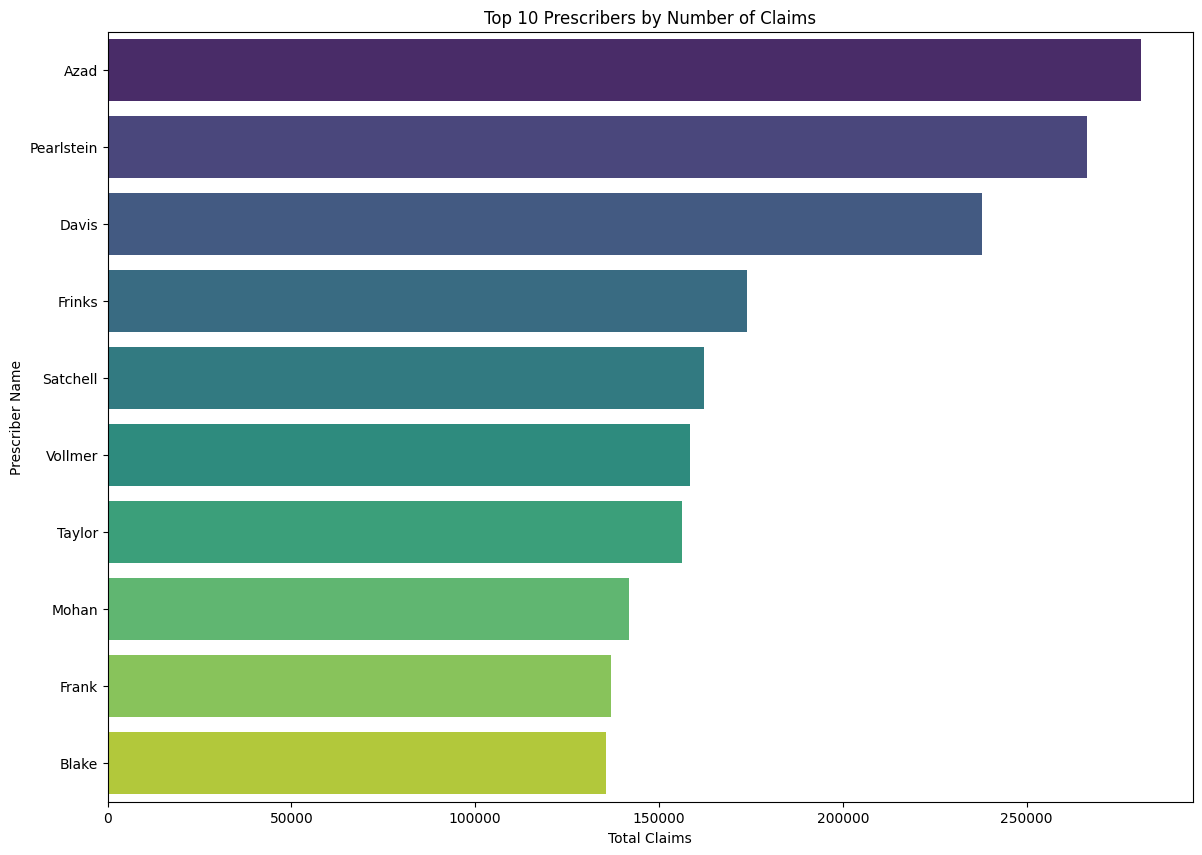

In [9]:
# Visualization for Top Prescribers
plt.figure(figsize=(14, 10))
sns.barplot(x='Total_Claims', y='Prscrbr_Last_Org_Name', hue='Prscrbr_Last_Org_Name', data=top_prescribers.sort_values('Total_Claims', ascending=False), palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Prescribers by Number of Claims')
plt.xlabel('Total Claims')
plt.ylabel('Prescriber Name')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

In [10]:
# Total Cost by Drug
query = """
SELECT Brnd_Name, SUM(Tot_Drug_Cst) as Total_Cost
FROM prescriptions
GROUP BY Brnd_Name
ORDER BY Total_Cost DESC
LIMIT 10;
"""

total_cost_by_drug = pd.read_sql_query(query, conn)
total_cost_by_drug

,Brnd_Name,Total_Cost
0,Eliquis,1.444361e+10
1,Trulicity,5.581472e+09
2,Revlimid,5.575094e+09
3,Jardiance,5.148228e+09
4,Xarelto,5.042545e+09
5,Ozempic,4.040317e+09
6,Januvia,3.505634e+09
7,Humira(Cf) Pen,3.248734e+09
8,Trelegy Ellipta,2.971640e+09
9,Imbruvica,2.561018e+09


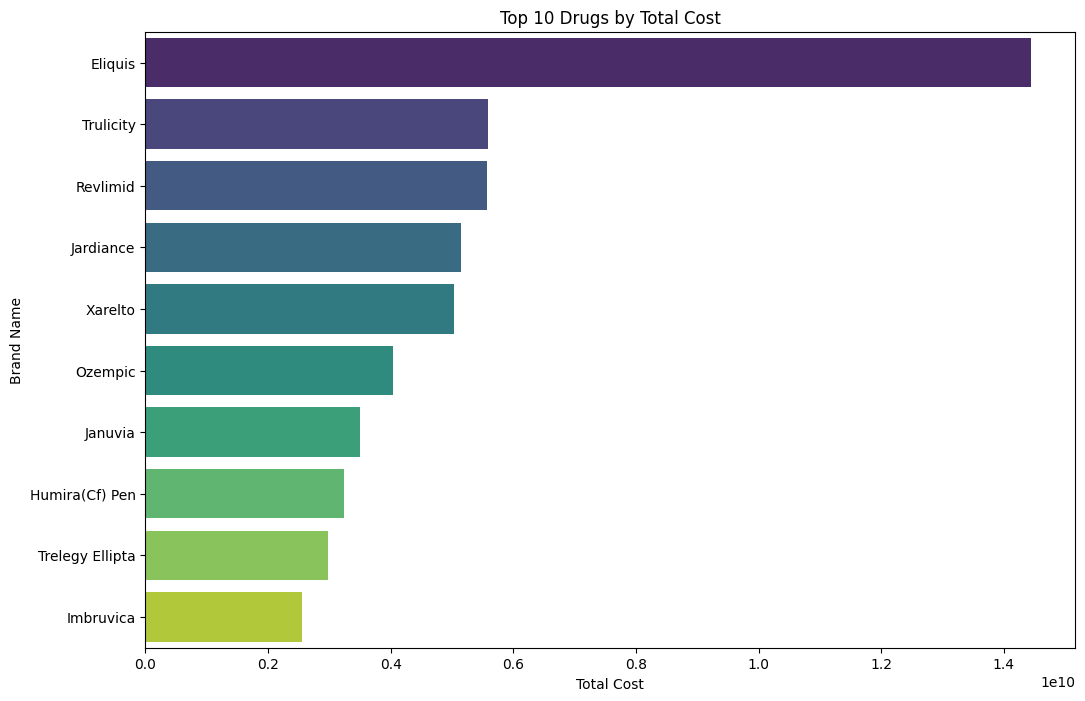

In [11]:
# Visualization for Total Cost by Drug
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Cost', y='Brnd_Name', hue='Brnd_Name', data=total_cost_by_drug, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Drugs by Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Brand Name')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

In [12]:
# Average Cost per Prescription by Drug
query = """
SELECT Brnd_Name, AVG(Tot_Drug_Cst / Tot_Clms) as Avg_Cost_Per_Prescription
FROM prescriptions
GROUP BY Brnd_Name
ORDER BY Avg_Cost_Per_Prescription DESC
LIMIT 10;
"""

avg_cost_per_prescription = pd.read_sql_query(query, conn)
avg_cost_per_prescription

,Brnd_Name,Avg_Cost_Per_Prescription
0,Revcovi,333526.202591
1,Cablivi,220547.601667
2,Myalept,159454.040297
3,Carbaglu,107964.627937
4,Vyondys-53,107177.440000
5,Strensiq,102880.767731
6,Berinert,98978.806514
7,Vimizim,98761.723442
8,Bylvay,96781.372308
9,Cinryze,96054.188414


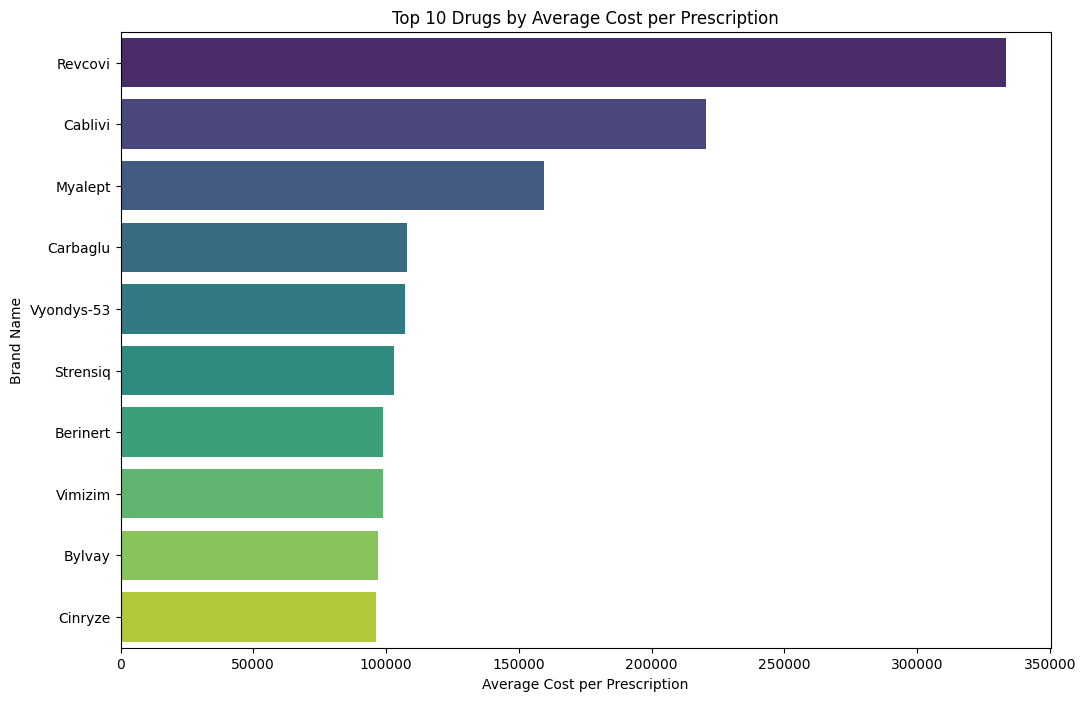

In [13]:
# Visualization for Average Cost per Prescription by Drug
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Cost_Per_Prescription', y='Brnd_Name', hue='Brnd_Name', data=avg_cost_per_prescription, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Drugs by Average Cost per Prescription')
plt.xlabel('Average Cost per Prescription')
plt.ylabel('Brand Name')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

In [14]:
# Prescriptions for Beneficiaries Age 65 and Older
query = """
SELECT Brnd_Name, SUM(GE65_Tot_Clms) as Total_Claims_65_Plus
FROM prescriptions
WHERE GE65_Tot_Clms IS NOT NULL
GROUP BY Brnd_Name
ORDER BY Total_Claims_65_Plus DESC
LIMIT 10;
"""

prescriptions_65_plus = pd.read_sql_query(query, conn)
prescriptions_65_plus

,Brnd_Name,Total_Claims_65_Plus
0,Atorvastatin Calcium,45090106
1,Amlodipine Besylate,28102012
2,Levothyroxine Sodium,25444335
3,Lisinopril,21807151
4,Gabapentin,19688328
5,Losartan Potassium,17205548
6,Omeprazole,16807167
7,Metoprolol Succinate,16064104
8,Metformin Hcl,14287263
9,Furosemide,12655436


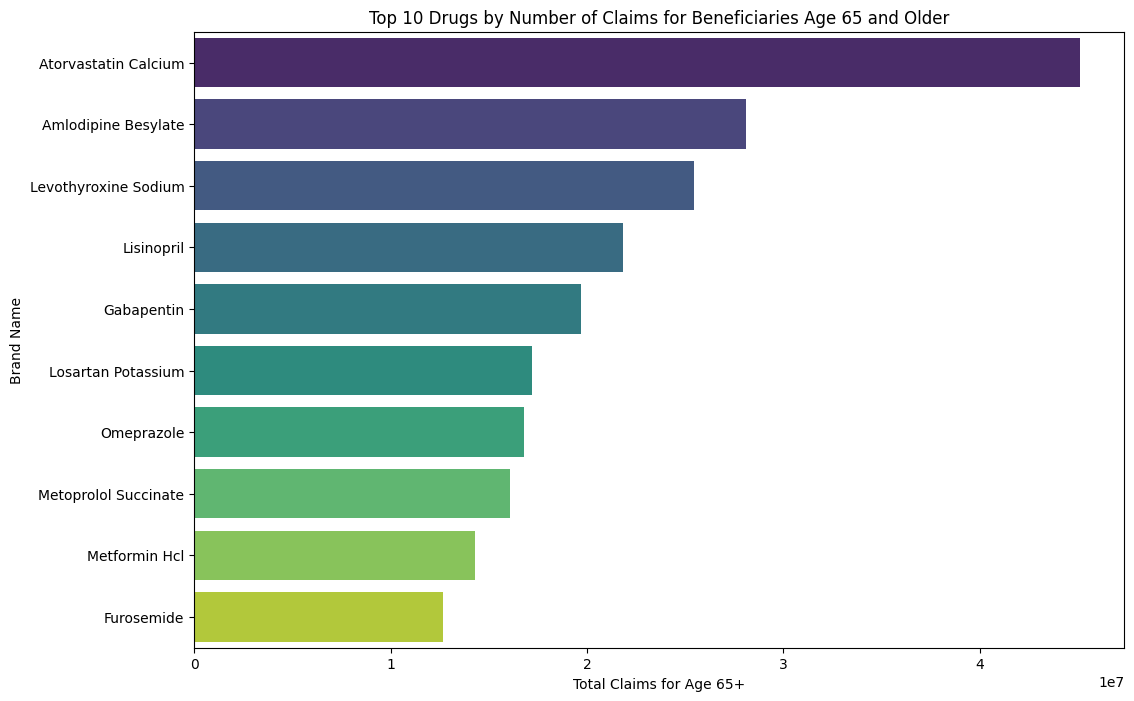

In [15]:
# Visualization for Prescriptions for Beneficiaries Age 65 and Older
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Claims_65_Plus', y='Brnd_Name', hue='Brnd_Name', data=prescriptions_65_plus, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Drugs by Number of Claims for Beneficiaries Age 65 and Older')
plt.xlabel('Total Claims for Age 65+')
plt.ylabel('Brand Name')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

In [16]:
# Close the database connection
conn.close()
print("Database connection closed.")

Database connection closed.
